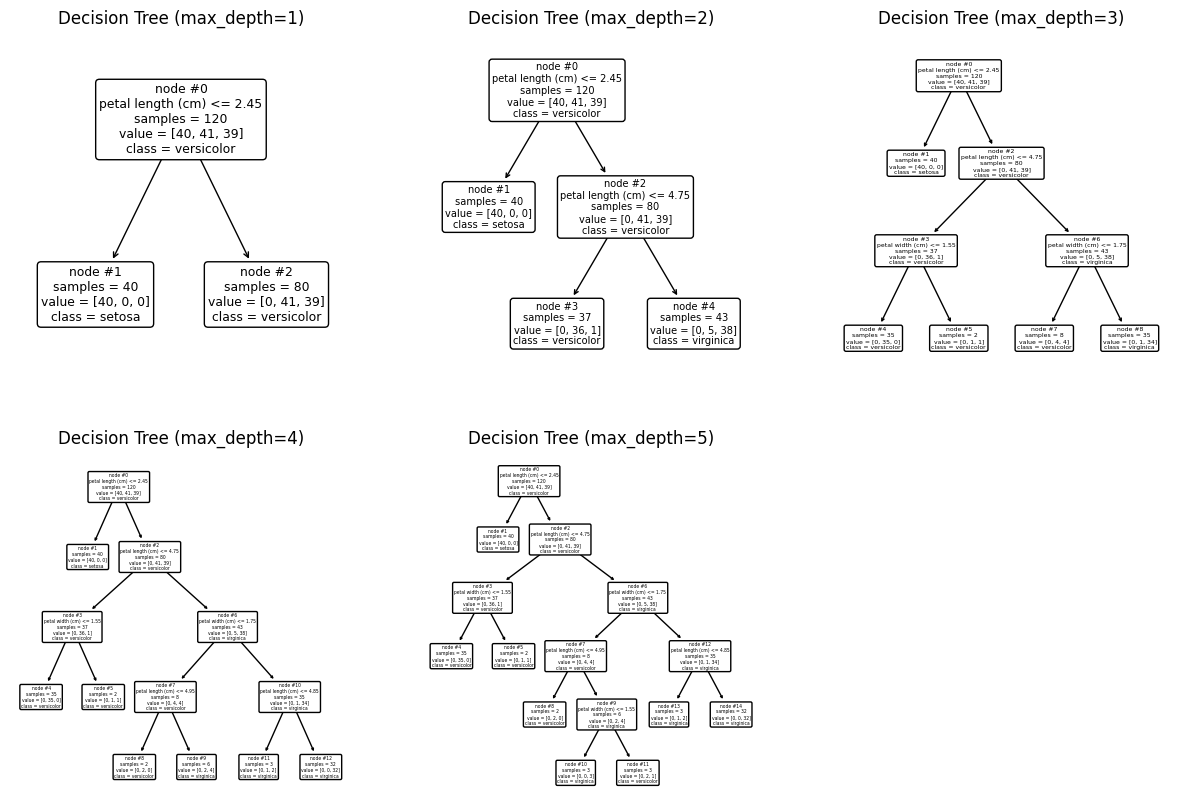

Problem 1 Results:
   precision_macro  recall_macro  f1_score_macro  precision_micro  \
1         0.816667      0.666667        0.540230         0.633333   
2         0.972222      0.962963        0.965899         0.966667   
3         1.000000      1.000000        1.000000         1.000000   
4         1.000000      1.000000        1.000000         1.000000   
5         1.000000      1.000000        1.000000         1.000000   

   recall_micro  f1_score_micro  precision_weighted  recall_weighted  \
1      0.633333        0.633333            0.835000         0.633333   
2      0.966667        0.966667            0.969444         0.966667   
3      1.000000        1.000000            1.000000         1.000000   
4      1.000000        1.000000            1.000000         1.000000   
5      1.000000        1.000000            1.000000         1.000000   

   f1_score_weighted  
1           0.519540  
2           0.966411  
3           1.000000  
4           1.000000  
5           1.0000

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Problem 1: Load Iris dataset and train decision trees
iris = load_iris()
X, y = iris.data, iris.target
depths = range(1, 6)

results = {}
plt.figure(figsize=(15, 10))
for i, depth in enumerate(depths, 1):
    clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=2, min_samples_split=5, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results[depth] = {
        'precision_macro': precision_score(y_test, y_pred, average='macro', zero_division=1),
        'recall_macro': recall_score(y_test, y_pred, average='macro'),
        'f1_score_macro': f1_score(y_test, y_pred, average='macro'),
        'precision_micro': precision_score(y_test, y_pred, average='micro', zero_division=1),
        'recall_micro': recall_score(y_test, y_pred, average='micro'),
        'f1_score_micro': f1_score(y_test, y_pred, average='micro'),
        'precision_weighted': precision_score(y_test, y_pred, average='weighted', zero_division=1),
        'recall_weighted': recall_score(y_test, y_pred, average='weighted'),
        'f1_score_weighted': f1_score(y_test, y_pred, average='weighted')
    }
    plt.subplot(2, 3, i)
    plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=False, rounded=True, impurity=False, node_ids=True)
    plt.title(f"Decision Tree (max_depth={depth})")
plt.show()

results_df = pd.DataFrame(results).T
print("Problem 1 Results:")
print(results_df)

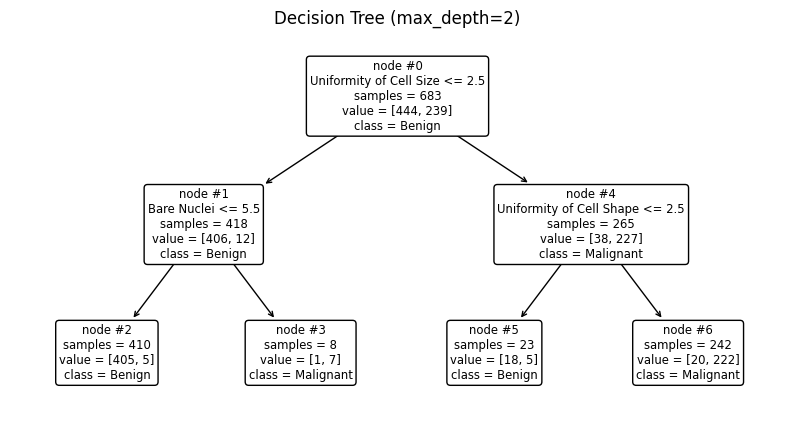

Entropy: 0.9340, Gini: 0.4550, Misclassification Error: 0.3499
Feature with highest information gain: Uniformity of Cell Size, Information Gain: 0.7023


In [5]:
# Problem 2
column_names = ["ID", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", 
                "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", 
                "Normal Nucleoli", "Mitoses", "Class"]
cancer_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", 
                        names=column_names, na_values='?')
cancer_df.dropna(inplace=True)
cancer_df.drop(columns=["ID"], inplace=True)
X = cancer_df.drop(columns=["Class"])
y = cancer_df["Class"].apply(lambda x: 1 if x == 4 else 0)  # 4 is malignant, 2 is benign

clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5, criterion='gini', random_state=42)
clf.fit(X, y)
plt.figure(figsize=(10, 5))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=["Benign", "Malignant"], filled=False, rounded=True, impurity=False, node_ids=True)
plt.title("Decision Tree (max_depth=2)")
plt.show()

def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p) if 0 < p < 1 else 0

def gini(p):
    return 2 * p * (1 - p)

def misclassification_error(p):
    return min(p, 1 - p)

prob = y.value_counts(normalize=True)[1]
entropy_value = entropy(prob)
gini_value = gini(prob)
mis_error_value = misclassification_error(prob)

print(f"Entropy: {entropy_value:.4f}, Gini: {gini_value:.4f}, Misclassification Error: {mis_error_value:.4f}")

def information_gain(X, y, feature):
    total_entropy = entropy(y.mean())
    values = X[feature].unique()
    weighted_entropy = sum((X[feature] == v).mean() * entropy(y[X[feature] == v].mean()) for v in values)
    return total_entropy - weighted_entropy

info_gains = {feature: information_gain(X, y, feature) for feature in X.columns}
best_feature = max(info_gains, key=info_gains.get)
print(f"Feature with highest information gain: {best_feature}, Information Gain: {info_gains[best_feature]:.4f}")

In [6]:
# Problem 3
column_names = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
cancer_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", 
                        names=column_names)
cancer_df.drop(columns=["ID"], inplace=True)
y = cancer_df["Diagnosis"].apply(lambda x: 1 if x == "M" else 0)  # M is malignant, B is benign
X = cancer_df.drop(columns=["Diagnosis"])

def train_pca_model(n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    return f1, precision, recall, fp, tp, fpr, tpr

pca_results = {}
for n in [1, 2]:
    pca_results[n] = train_pca_model(n)

pca_results_df = pd.DataFrame(pca_results, index=["F1-score", "Precision", "Recall", "FP", "TP", "FPR", "TPR"]).T
print("Problem 3 Results:")
print(pca_results_df)

Problem 3 Results:
   F1-score  Precision    Recall   FP    TP  FPR       TPR
1     0.925        1.0  0.860465  0.0  37.0  0.0  0.860465
2     0.925        1.0  0.860465  0.0  37.0  0.0  0.860465
